In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_random_subset = pd.read_csv('/content/drive/MyDrive/Data Science Project - H&M/Datasets/df_random_subset.csv')

In [ ]:
df_random_subset.head(10)

,Unnamed: 0,Unnamed: 0.1,customer_id,firstpurch,lastpurch08,purch06,purch07,purch08,purch09,price06,...,recent,monetary,frequent,rix,R_Q,fix,F_Q,mix,M_Q,RFMscore
0,40187,526556,30601b3d3aa5125a3b2bfb95cbeae323bfda8f99dc2794...,2020-06-04,2020-06-04,2,0,0,2,0.042339,...,88,0.014434,0.681818,526556,5,37574,1,40188,1,511
1,320241,16304,82e69be62a5a23eafba6fce3ba7c8dfd57b8e1e1d061f4...,2020-06-25,2020-08-30,3,4,2,0,0.064356,...,1,0.086076,4.029851,16304,1,330253,4,320242,3,143
2,353362,240745,62e9ae1eaa66461f52d1869344ee844eb19218e0f50615...,2020-07-01,2020-08-02,0,6,3,2,0.000000,...,29,0.101953,4.426230,240745,3,349104,4,353363,4,344
3,459311,190688,468f9f68937de6cee3ebc6f645c634b45acb2007193e72...,2020-08-09,2020-08-09,0,0,8,3,0.000000,...,22,0.205516,10.909091,190688,2,483146,5,459312,5,255
4,387159,243975,ff51dac9d1c584eb72e4a8006277e717c22d4cfef0ef90...,2020-06-05,2020-08-02,8,1,16,0,0.132068,...,29,0.123407,8.620690,243975,3,459411,5,387160,4,354
5,295992,187973,bf5fbd80efa1eabfcdb628d3ba59d2756349f035218706...,2020-08-10,2020-08-10,0,0,1,0,0.000000,...,21,0.076247,1.428571,187973,2,124651,2,295993,3,223
6,278549,529813,317ac6f42f8b5344c059162dc47746083101ebfd311b34...,2020-06-03,2020-06-03,7,0,0,0,0.208356,...,89,0.070232,2.359551,529813,5,216467,2,278550,3,523
7,504609,85295,d72592128fc27a3ed95ad7c4039dcce040bc9e3bff96c7...,2020-06-19,2020-08-24,28,2,10,0,0.648678,...,7,0.376550,16.438356,85295,1,508961,5,504610,5,155
8,287913,431276,1278abda4402b71f95b5a37438b98de276fa5dc802c8b9...,2020-06-09,2020-06-26,7,0,0,0,0.203271,...,66,0.073472,2.530120,431276,4,231442,3,287914,3,433
9,286089,5066,74caaabc0c79bde6e499e872c762270371c481395921b8...,2020-06-25,2020-08-31,2,6,2,0,0.049119,...,0,0.072780,4.477612,5066,1,351363,4,286090,3,143


In [ ]:
df_random_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53788 entries, 0 to 53787
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                53788 non-null  int64  
 1   Unnamed: 0.1              53788 non-null  int64  
 2   customer_id               53788 non-null  object 
 3   firstpurch                53788 non-null  object 
 4   lastpurch08               53788 non-null  object 
 5   purch06                   53788 non-null  int64  
 6   purch07                   53788 non-null  int64  
 7   purch08                   53788 non-null  int64  
 8   purch09                   53788 non-null  int64  
 9   price06                   53788 non-null  float64
 10  price07                   53788 non-null  float64
 11  price08                   53788 non-null  float64
 12  FN                        53788 non-null  int64  
 13  Active                    53788 non-null  int64  
 14  club_m

## Correlation

In [ ]:
corr = df_random_subset.corr()
corr['ret09'].sort_values(ascending = False)

ret09                       1.000000
purch09                     0.635535
graphical_solid             0.348492
pd_garmentupperbody         0.345565
colorvalue_dark             0.330305
colormaster_black           0.319276
indexgroup_ladieswear       0.318894
colorvalue_dustylight       0.297024
sec_w_collect               0.277036
colorvalue_mediumdusty      0.272742
pd_garmentlowerbody         0.259978
garmentgroup_fancy          0.251246
indexgroup_divided          0.245454
colormaster_beige           0.240116
colormaster_white           0.238637
weekend                     0.228903
colorvalue_light            0.223717
numpd                       0.217437
numpurch                    0.211507
dollpurch                   0.210535
garmentgroup_basic          0.207224
sec_d_collect               0.197928
colormaster_blue            0.188323
pd_garmentfullbody          0.181096
garmentgroup_nightwear      0.179596
colormaster_pink            0.172218
graphical_alloverpattern    0.169945
a

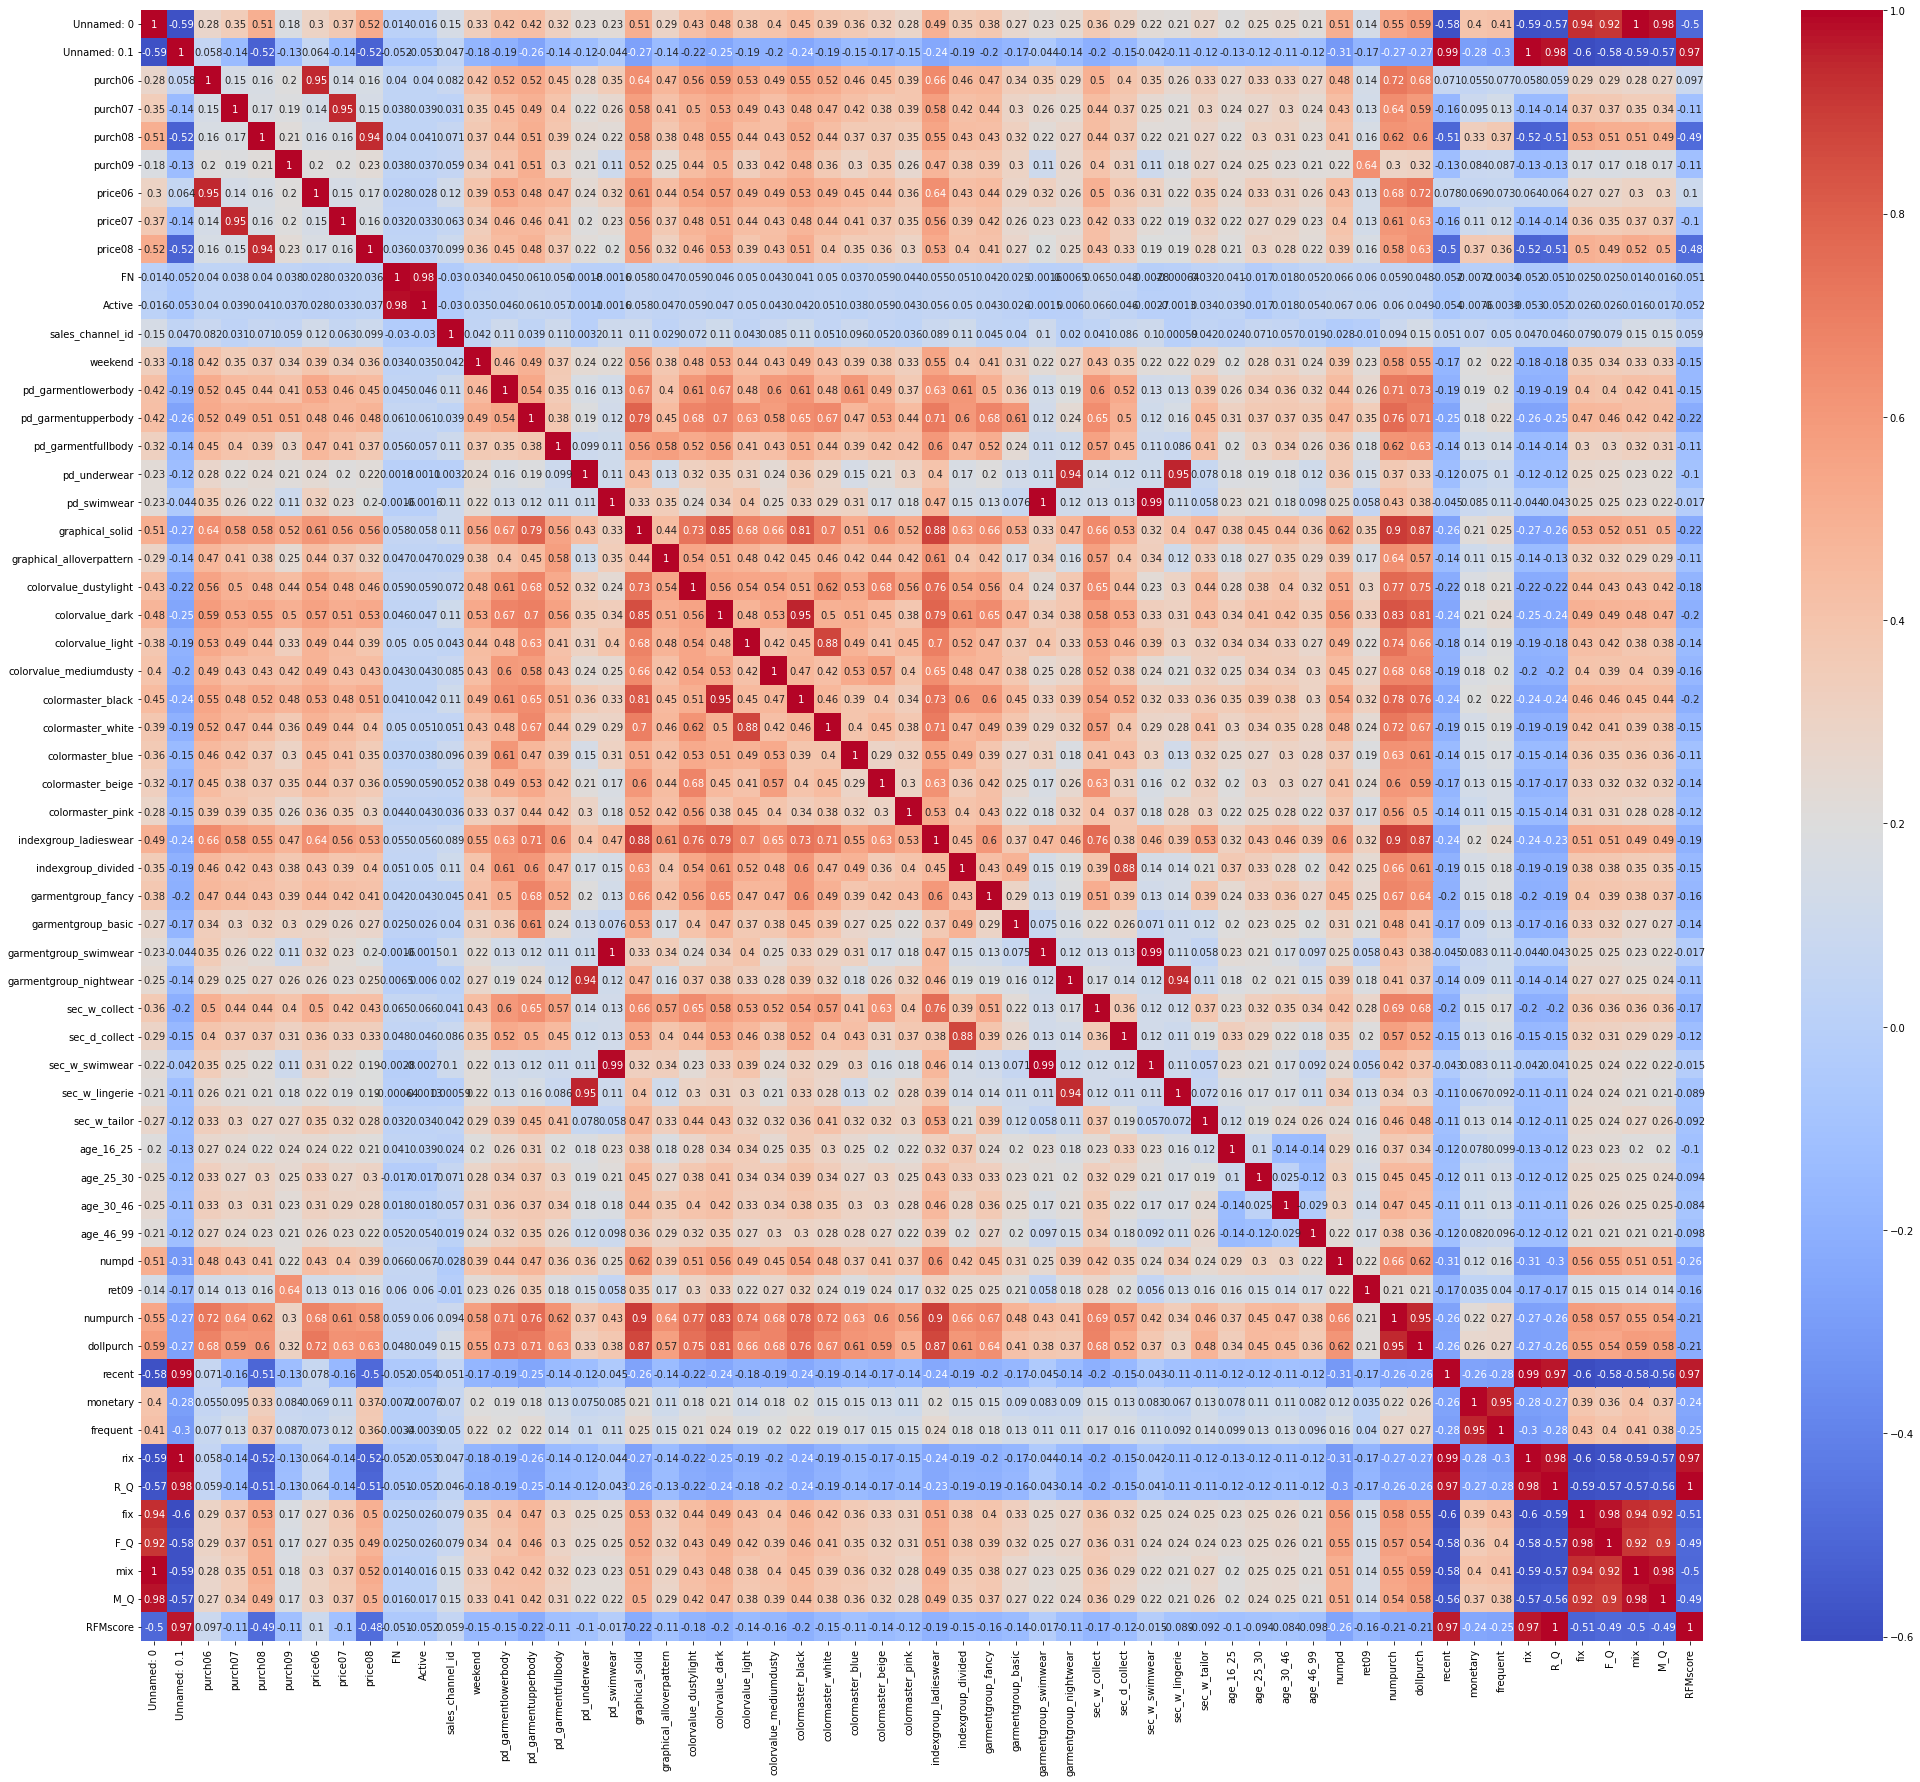

In [ ]:
plt.figure(figsize=(35,30))
corr = df_random_subset.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

## Data Processing

In [ ]:
df_random_subset = pd.get_dummies(df_random_subset, columns = ['club_member_status'])

In [ ]:
df_random_subset = df_random_subset.drop(columns = ['purch09'], axis = 1)

In [ ]:
df_random_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53788 entries, 0 to 53787
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     53788 non-null  int64  
 1   Unnamed: 0.1                   53788 non-null  int64  
 2   customer_id                    53788 non-null  object 
 3   firstpurch                     53788 non-null  object 
 4   lastpurch08                    53788 non-null  object 
 5   purch06                        53788 non-null  int64  
 6   purch07                        53788 non-null  int64  
 7   purch08                        53788 non-null  int64  
 8   price06                        53788 non-null  float64
 9   price07                        53788 non-null  float64
 10  price08                        53788 non-null  float64
 11  FN                             53788 non-null  int64  
 12  Active                         53788 non-null 

## Train-test Split

In [ ]:
df = df_random_subset.drop(columns= ['Unnamed: 0', 'customer_id', 'firstpurch', 'lastpurch08', 
                                    'postal_code', 'rix', 'recent', 'R_Q', 'RFMscore', 'sales_channel_id', 
                                    'monetary', 'frequent', 
                                    'sec_w_swimwear', 'garmentgroup_swimwear', 'pd_swimwear', 
                                    'Active', 'FN', 'sec_w_lingerie', 'purch06', 'purch07', 'price06', 'price07',
                                    'recent', 'fix', 'F_Q', 'M_Q', 'RFMscore'], axis = 1)

In [ ]:
X = df.drop(columns= 'ret09', axis =1 )
y = df['ret09']

In [ ]:
#Create train/validation/test sample
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13343)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=13343) # 0.25 x 0.8 = 0.2

## k-NN

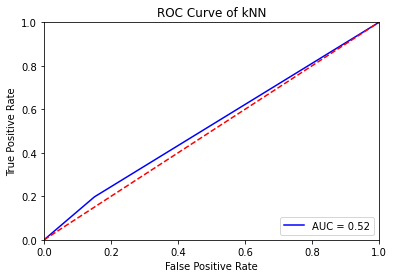


 ROC AUC: 
 0.5235283226379185
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      8165
           1       0.29      0.20      0.24      2593

    accuracy                           0.69     10758
   macro avg       0.53      0.52      0.52     10758
weighted avg       0.65      0.69      0.67     10758

Confusion matrix: 
 [[6937 1228]
 [2081  512]]
Accuracy: 0.692414947016174
Precision: 0.2942528735632184
Recall: 0.19745468569224836
F1 score: 0.23632587122086315


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val) 

#Model Evaluation
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

#print('Prediction: {}'.format(prediction))
#print('With KNN (K=3) accuracy is: ',knn.score(y_val,y_test)) # accuracy

fpr, tpr, threshold = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()


#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('\n ROC AUC: \n',roc_auc_score(y_val, y_pred))
print('Classification report: \n',classification_report(y_val,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_val,y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:",f1_score(y_val, y_pred))

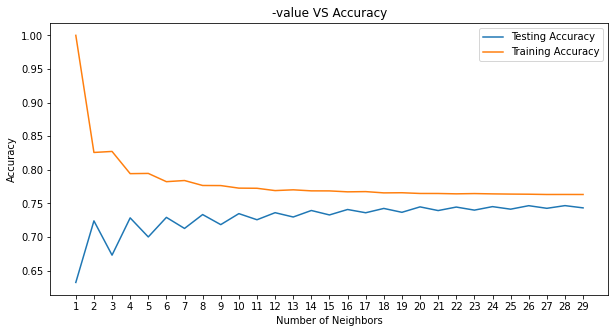

Best accuracy is 0.7467930842163971 with K = 28


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Model complexity
neig = np.arange(1, 30)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 30(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_val, y_test))

# Plot
plt.figure(figsize=[10,5])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

## Logistic

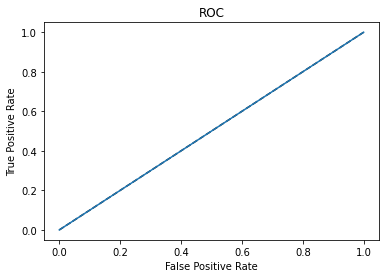


 ROC AUC: 
 0.5
Classification report: 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      8165
           1       0.00      0.00      0.00      2593

    accuracy                           0.76     10758
   macro avg       0.38      0.50      0.43     10758
weighted avg       0.58      0.76      0.65     10758

Confusion matrix: 
 [[8165    0]
 [2593    0]]
Accuracy: 0.7589700687860197
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('\n ROC AUC: \n',roc_auc_score(y_val, y_pred))
print('Classification report: \n',classification_report(y_val,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_val,y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:",f1_score(y_val, y_pred))

In [ ]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

In [ ]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_val)

#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('\n ROC AUC: \n',roc_auc_score(y_val, y_pred))
print('Classification report: \n',classification_report(y_val,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_val,y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:",f1_score(y_val, y_pred))


 ROC AUC: 
 0.5926696043731663
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.95      0.86      8165
           1       0.59      0.24      0.34      2593

    accuracy                           0.78     10758
   macro avg       0.69      0.59      0.60     10758
weighted avg       0.75      0.78      0.74     10758

Confusion matrix: 
 [[7726  439]
 [1973  620]]
Accuracy: 0.7757947573898494
Precision: 0.5854579792256847
Recall: 0.239105283455457
F1 score: 0.33953997809419495


## SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)

#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('\n ROC AUC: \n',roc_auc_score(y_val, y_pred))
print('Classification report: \n',classification_report(y_val,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_val,y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:",f1_score(y_val, y_pred))


 ROC AUC: 
 0.5836279738492324
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.88      8165
           1       0.74      0.19      0.30      2593

    accuracy                           0.79     10758
   macro avg       0.77      0.58      0.59     10758
weighted avg       0.78      0.79      0.74     10758

Confusion matrix: 
 [[7994  171]
 [2105  488]]
Accuracy: 0.7884365123628927
Precision: 0.7405159332321699
Recall: 0.18819899730042422
F1 score: 0.3001230012300123


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=13343)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_val)

#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, classification_report, accuracy_score, f1_score
print('\n ROC: \n',roc_auc_score(y_val, y_pred))
print('Classification report: \n',classification_report(y_val,y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:",f1_score(y_val, y_pred))



 ROC: 
 0.8010321962965438
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      8165
           1       0.84      0.64      0.73      2593

    accuracy                           0.88     10758
   macro avg       0.86      0.80      0.83     10758
weighted avg       0.88      0.88      0.88     10758

Accuracy: 0.8833426287414018
Precision: 0.8358433734939759
Recall: 0.6421133821827999
F1 score: 0.7262813522355508


## Random Forest

In [ ]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 13343, bootstrap = True, max_features='auto', max_depth = 82,min_samples_leaf = 2, min_samples_split=2, n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)


#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('\n ROC AUC: \n',roc_auc_score(y_val, y_pred))
print('Classification report: \n',classification_report(y_val,y_pred))
print('Confusion matrix: \n', confusion_matrix(y_val,y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 score:",f1_score(y_val, y_pred))


 ROC AUC: 
 0.8006897603869668
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      8165
           1       0.90      0.62      0.74      2593

    accuracy                           0.89     10758
   macro avg       0.90      0.80      0.83     10758
weighted avg       0.89      0.89      0.89     10758

Confusion matrix: 
 [[7993  172]
 [ 979 1614]]
Accuracy: 0.8930098531325525
Precision: 0.9036954087346024
Recall: 0.6224450443501736
F1 score: 0.7371546015071934


## Random Hyperparameter Grid

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 100]}

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 100]}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 13343)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 82,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

## XGBoost

In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(max_depth=80, n_estimators=100,
                           reg_alpha=0.5, reg_lambda=0,
                           booster='gbtree',
                           random_state=13343, learning_rate=0.1)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_val)

#Model Evaluation
from sklearn.metrics import roc_auc_score, r2_score, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
print('\n ROC: \n',roc_auc_score(y_val, xgb_pred))
print('Classification report: \n',classification_report(y_val,xgb_pred))
print('XGBoost Validation Sample Confusion matrix: \n', confusion_matrix(y_val,xgb_pred))
print("Accuracy:", accuracy_score(y_val, xgb_pred))
print("Precision:", precision_score(y_val, xgb_pred))
print("Recall:", recall_score(y_val, xgb_pred))
print("F1 score:",f1_score(y_val, xgb_pred))

print(     )
#Test sample
print('\n ROC: \n',roc_auc_score(y_test, xgb_pred))
print('XGBoost Test Sample Classification report: \n',classification_report(y_test,xgb_pred))




 ROC: 
 0.9409323561550729
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      8165
           1       0.97      0.89      0.93      2593

    accuracy                           0.97     10758
   macro avg       0.97      0.94      0.95     10758
weighted avg       0.97      0.97      0.97     10758

XGBoost Validation Sample Confusion matrix: 
 [[8101   64]
 [ 286 2307]]
Accuracy: 0.9674660717605503
Precision: 0.9730071699704765
Recall: 0.8897030466640956
F1 score: 0.9294923448831587


 ROC: 
 0.4951440595815377
XGBoost Test Sample Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      8176
           1       0.23      0.21      0.22      2582

    accuracy                           0.64     10758
   macro avg       0.49      0.50      0.49     10758
weighted avg       0.63      0.64      0.64     10758



## Feature Importance

In [ ]:
xgb.feature_importances_

array([0.01207099, 0.0093107 , 0.00941165, 0.03743178, 0.02170215,
       0.06932385, 0.01214651, 0.01052843, 0.22605178, 0.01576594,
       0.02250825, 0.03183675, 0.01195616, 0.0170174 , 0.01655512,
       0.00923507, 0.01146018, 0.01062477, 0.01033862, 0.05158063,
       0.01910575, 0.0094188 , 0.01020585, 0.01157222, 0.01261597,
       0.01110608, 0.01013692, 0.04118969, 0.034171  , 0.03655675,
       0.04028409, 0.02466668, 0.08022588, 0.01066137, 0.01149185,
       0.01101802, 0.        , 0.00510969, 0.00360669], dtype=float32)

Text(0.5, 0, 'Xgboost Feature Importance')

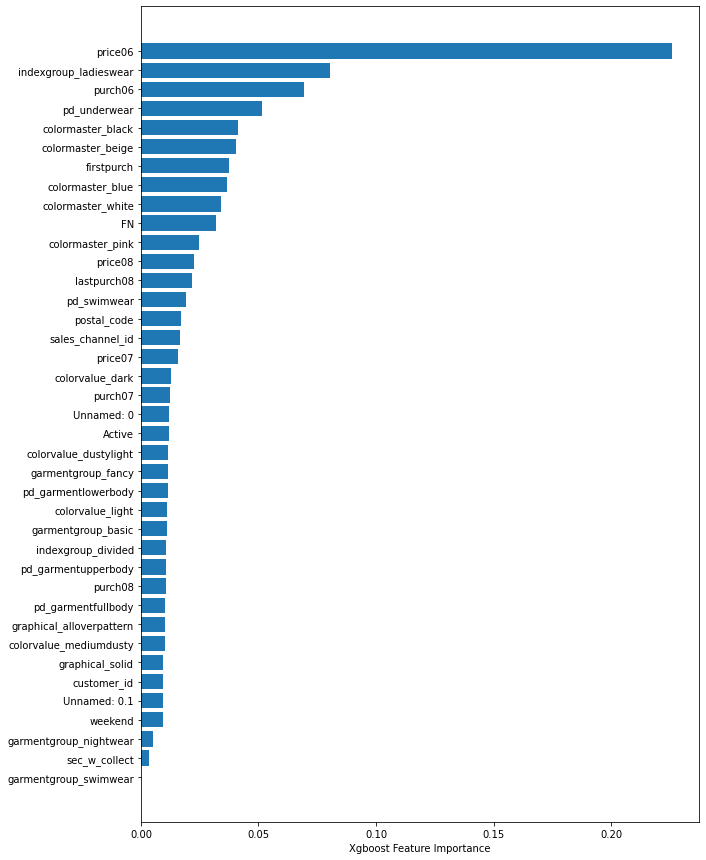

In [ ]:
plt.figure(figsize=(10,15))
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(df_random_subset.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
def feature_importance(model, feature_list):
    """
    Function that gets and plots the feature importance
    for the given model
    :param model: the model to evaluaate
    :param feature_list: a list of features contained in the model
    :returns a plot with feature importance
    """
    #Get the list of feaature importance from the model
    importances = list(model.feature_importances_)
    #zip together feature names and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    #sort the feature importance by importance
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    #Print the list of feature importance
    [print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];
    #set colors for the plot
    colors = cm.rainbow(np.linspace(0, 1, len(feature_list)))
    
    #get the list of features sorted
    characteristics = [x[0] for x in feature_importances]
    #get the list of importance sorted
    importances_plot = [x[1] for x in feature_importances]
    #plot in a bar plot
    plt.bar(characteristics, importances_plot, color=colors)
    #adjust characteristics of the plot
    plt.xticks(list(range(len(characteristics))), characteristics, rotation = 90)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gcf().subplots_adjust(bottom=0.3)
    plt.show()

## ROC Curve

In [ ]:
auc_
auc_log, fpr_log, tpr_log = get_scores(y, best_log_estimator.predict(x), best_log_estimator.predict_proba(x)[:,1])
auc_svm, fpr_svm, tpr_svm = get_scores(y, best_svm_estimator.predict(x), best_svm_estimator.predict_proba(x)[:,1])
auc_rf, fpr_rf, tpr_rf = get_scores(y, best_rf_estimator.predict(x), best_rf_estimator.predict_proba(x)[:,1])

In [ ]:

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log, tpr_log, label = f'Logistic Regression Score: {str(round(auc_log, 3))}', color='#FA8072')
plt.plot(fpr_svm, tpr_svm, label = f'SVM RBF Score: {str(round(auc_svm, 3))}', color='#82E0AA')
plt.plot(fpr_rf, tpr_rf, label = f'Random Forest Score: {str(round(auc_rf, 3))}', color='#A569BD')
plt.plot([0,1], [0,1], '--', label = 'score 0.5', color='#34495E')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()